In [3]:
from sympy import *
import numpy as np
init_printing()

t1, t2, t3, t4, t5 = symbols('theta1 theta2 theta3 theta4 theta5')
d1, a1, a2, a3, d5 = symbols('d1 a1 a2 a3 d5')

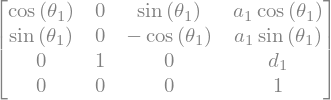

In [4]:
T01 = Matrix([
    [cos(t1),   0,  sin(t1), cos(t1)*a1], 
    [sin(t1),   0, -cos(t1), sin(t1)*a1], 
    [      0,   1,        0,         d1], 
    [      0,   0,        0,          1]])
T01

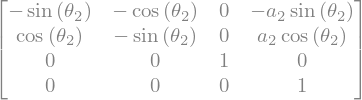

In [5]:
T12 = Matrix([
    [-sin(t2), -cos(t2),  0, -sin(t2)*a2],
    [ cos(t2), -sin(t2),  0,  cos(t2)*a2], 
    [       0,        0,  1,           0], 
    [       0,        0,  0,           1]])
T12

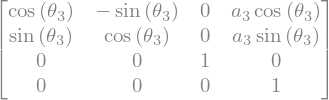

In [6]:
T23 = Matrix([
    [cos(t3), -sin(t3),  0, cos(t3)*a3],
    [sin(t3),  cos(t3),  0, sin(t3)*a3],
    [      0,        0,  1,          0],
    [      0,        0,  0,          1]])
T23

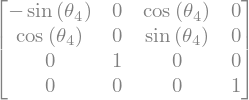

In [7]:
T34 = Matrix([
    [-sin(t4),  0, cos(t4),  0],
    [ cos(t4),  0, sin(t4),  0],
    [       0,  1,       0,  0],
    [       0,  0,       0,  1]])
T34

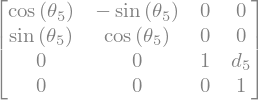

In [8]:
T45 = Matrix([
    [cos(t5), -sin(t5),  0,  0],
    [sin(t5),  cos(t5),  0,  0],
    [      0,        0,  1, d5],
    [      0,        0,  0,  1]])
T45

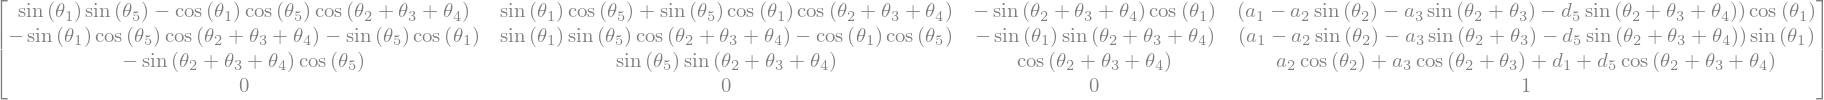

In [9]:
T05 = T01*T12*T23*T34*T45
T05 = simplify(T05)
T05

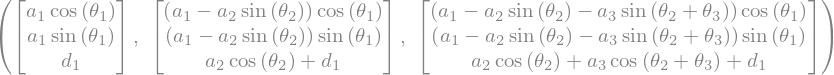

In [19]:
Origin = Matrix ([[0], [0], [0], [1]])
O1 = T01 * Origin
O1 = O1[0:3, :]
O2 = T01* T12 * Origin
O2 = simplify(O2[0:3, :])
O3 = T01* T12 * T23 * Origin
O3 = simplify(O3[0:3, :])
O4 = T01* T12 * T23 * T34 * Origin
O4 = simplify(O4[0:3, :])
O5 = T01* T12 * T23 * T34 * T45 * Origin
O5 = simplify(O5[0:3, :])

O1, O2, O3


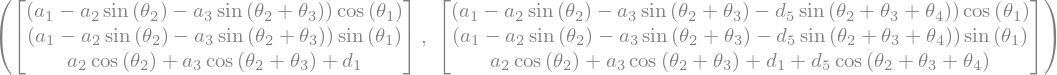

In [20]:
O4, O5

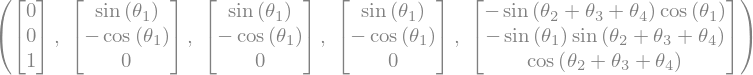

In [11]:
ZAxis = Matrix ([[0], [0], [1]])
Z1 = ZAxis
Z2 = T01[0:3, 0:3] * ZAxis
Z3 = T01[0:3, 0:3] * T12[0:3, 0:3] * ZAxis
Z4 = T01[0:3, 0:3] * T12[0:3, 0:3] * T23[0:3, 0:3] * ZAxis
Z5 = T01[0:3, 0:3] * T12[0:3, 0:3] * T23[0:3, 0:3] * T34[0:3, 0:3] * ZAxis
Z5 = simplify(Z5)

Z1, Z2, Z3, Z4, Z5

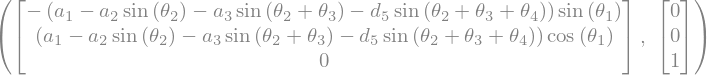

In [12]:
JV1 = Z1.cross(O5)
JW1 = Z1
JV1, JW1

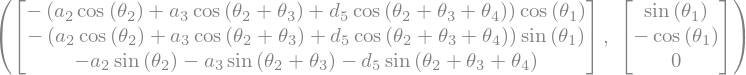

In [13]:
JV2 = simplify(Z2.cross(O5 - O1))
JW2 = Z2
JV2, JW2

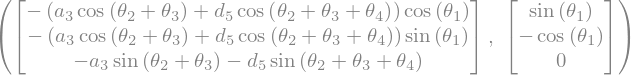

In [14]:
JV3 = simplify(Z3.cross(O5 - O2))
JW3 = Z3
JV3, JW3

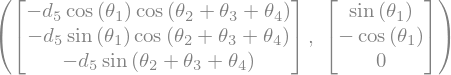

In [15]:
JV4 = simplify(Z4.cross(O5 - O3))
JW4 = Z4
JV4, JW4

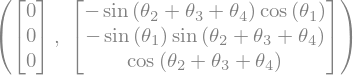

In [16]:
JV5 = simplify(Z5.cross(O5 - O4))
JW5 = Z5
JV5, JW5

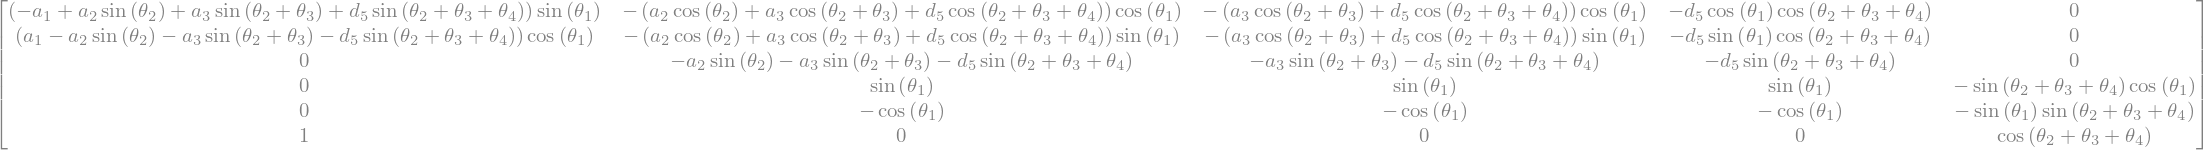

In [17]:
J = simplify(Matrix([[JV1, JV2, JV3, JV4, JV5], [JW1, JW2, JW3, JW4, JW5]]))
J

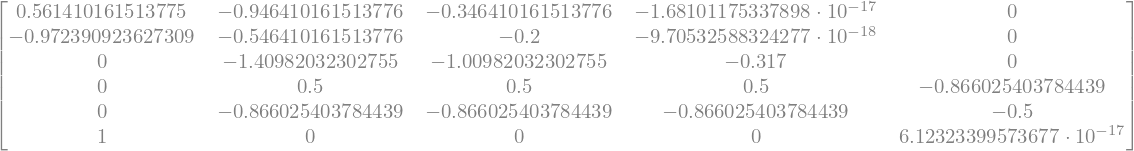

In [18]:
# Calculando a matriz Jacobiana para comparar com o que é calculado pela Robotics Toolbox
J.subs({t1: np.pi/6, t2: np.pi/6, t3: np.pi/6, t4: np.pi/6, t5: np.pi/6, d1: 0.155, a1: 0.287, a2: 0.8, a3: 0.8, d5: 0.317})